# TP 4
## Procesamiento en el dominio espacial

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Punto 1

## Negativo

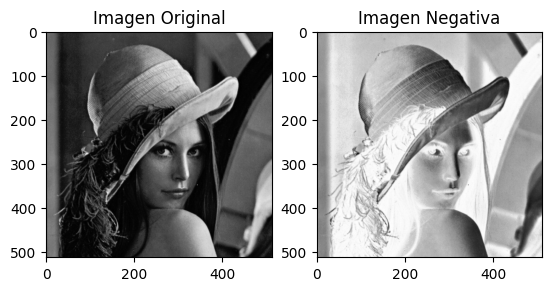

In [2]:
img = cv2.imread('Imagenes/lena_gray.tif', cv2.IMREAD_UNCHANGED)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
negative = 255 - img
fig[1].imshow(negative, cmap='gray')
fig[1].set_title('Imagen Negativa')
plt.show()

In [3]:
print (img.max())

227


## Transformación

La idea es hacer una transformación por tramos, donde todos los valores menores a 0.25 se mapean a 0, y todos los mayores a 0.5 se mapean a 1

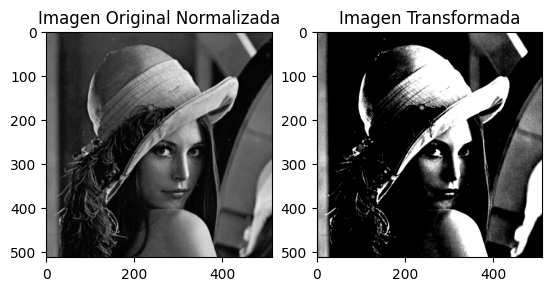

In [4]:
img = img.astype(np.float32) / 255.0 #para normalizar entre 0 y 1
low_in, high_in = 0.25, 0.5
low_out, high_out = 0.0, 1.0

transformed = np.clip((img - low_in) / (high_in - low_in), 0, 1) # Escala entre 0 y 1

ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original Normalizada')
fig[1].imshow(transformed, cmap='gray')
fig[1].set_title('Imagen Transformada')
plt.show()

# Punto 2

Parece haber un problema de contraste, esto se debería observar en el histograma.

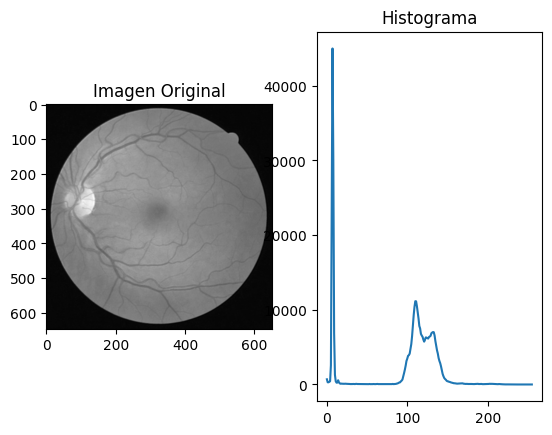

In [5]:
img = cv2.imread('Imagenes/eyebw.jpg', cv2.IMREAD_GRAYSCALE)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
hist, bins = np.histogram(img.flatten(), 256, [0,256])
fig[1].plot(hist)
fig[1].set_title('Histograma')
plt.show()

Hay un pico en 0 por el marco negro de la foto. Si ignoramos esto, observamos que hay muy poca dispersión entre los valores de intensidad (hay poca diferencia entre la mínima y máxima intensidad).

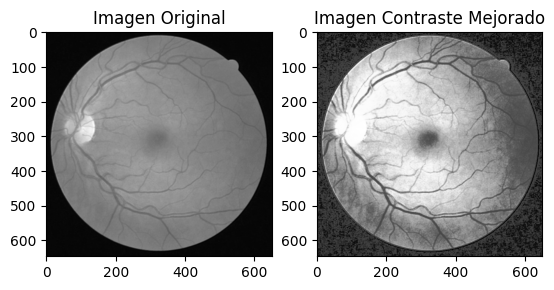

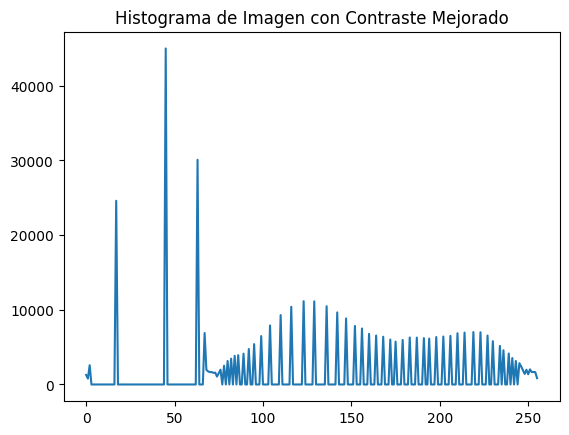

In [6]:
contraste = cv2.equalizeHist(img)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
fig[1].imshow(contraste, cmap='gray')
fig[1].set_title('Imagen Contraste Mejorado')
plt.show()

hist, bins = np.histogram(contraste.flatten(), 256, [0,256])
plt.plot(hist)
plt.title('Histograma de Imagen con Contraste Mejorado')
plt.show()

El marco no es completamente negro, creo que esto está haciendo que se "borronee". Voy a hacer una transformación previa para ver si mejora.

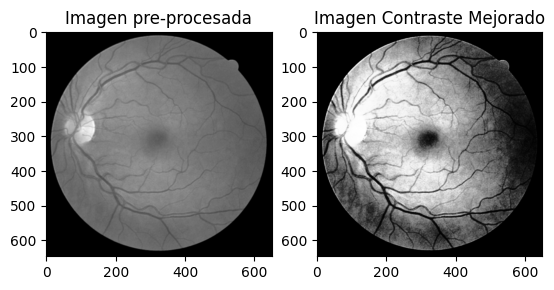

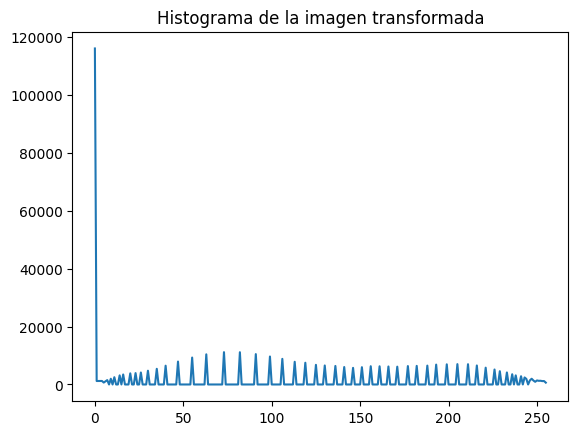

In [7]:

low_in, high_in = 0.1, 0.95
low_out, high_out = 0.0, 1.0
img_copy = img.astype(np.float32) / 255.0 #para normalizar entre 0 y 1
recortada = np.clip((img_copy - low_in) / (high_in - low_in), low_out, high_out) # Escala entre 0 y 1

recortada = (recortada * 255.0).astype(np.uint8) # Volver a 0-255 para equalizeHist

contraste = cv2.equalizeHist(recortada)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(recortada, cmap='gray')
fig[0].set_title('Imagen pre-procesada')
fig[1].imshow(contraste, cmap='gray')
fig[1].set_title('Imagen Contraste Mejorado')
plt.show()

#mostrar histograma
hist, bins = np.histogram(contraste.flatten(), 256, [0,256])
plt.plot(hist)
plt.title('Histograma de la imagen transformada')
plt.show()

Con esto se ve que se obtuvo una dispersión mucho más grande en las intensidades, mejorando así el contraste.

# Punto 3

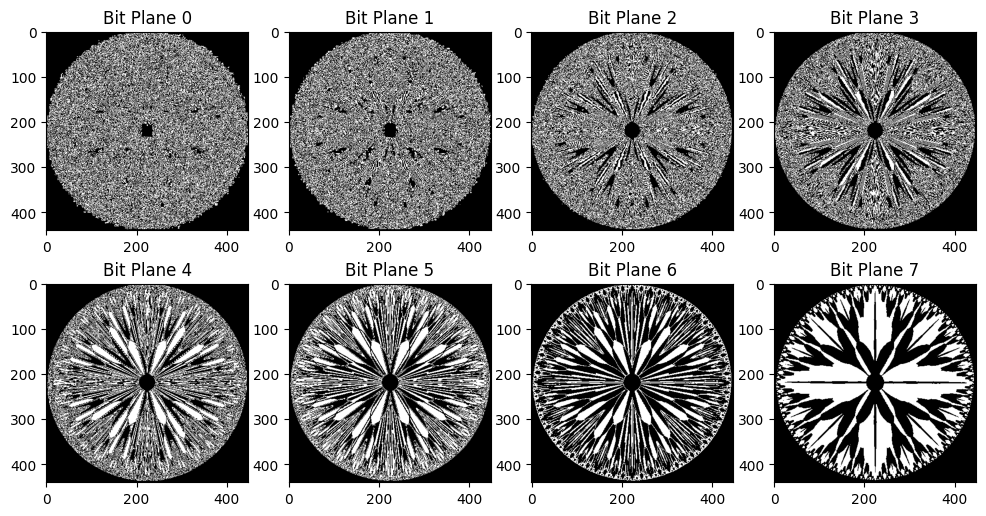

In [8]:
# bit plane slicing
img = cv2.imread('Imagenes/8 bit fractal (gonzales - woods).png', cv2.IMREAD_UNCHANGED)
ax, fig = plt.subplots(2, 4, figsize=(12, 6))
for i in range(8):
    bit_plane = (img >> i) & 1
    fig[i // 4, i % 4].imshow(bit_plane * 255, cmap='gray')
    fig[i // 4, i % 4].set_title(f'Bit Plane {i}')
plt.show()


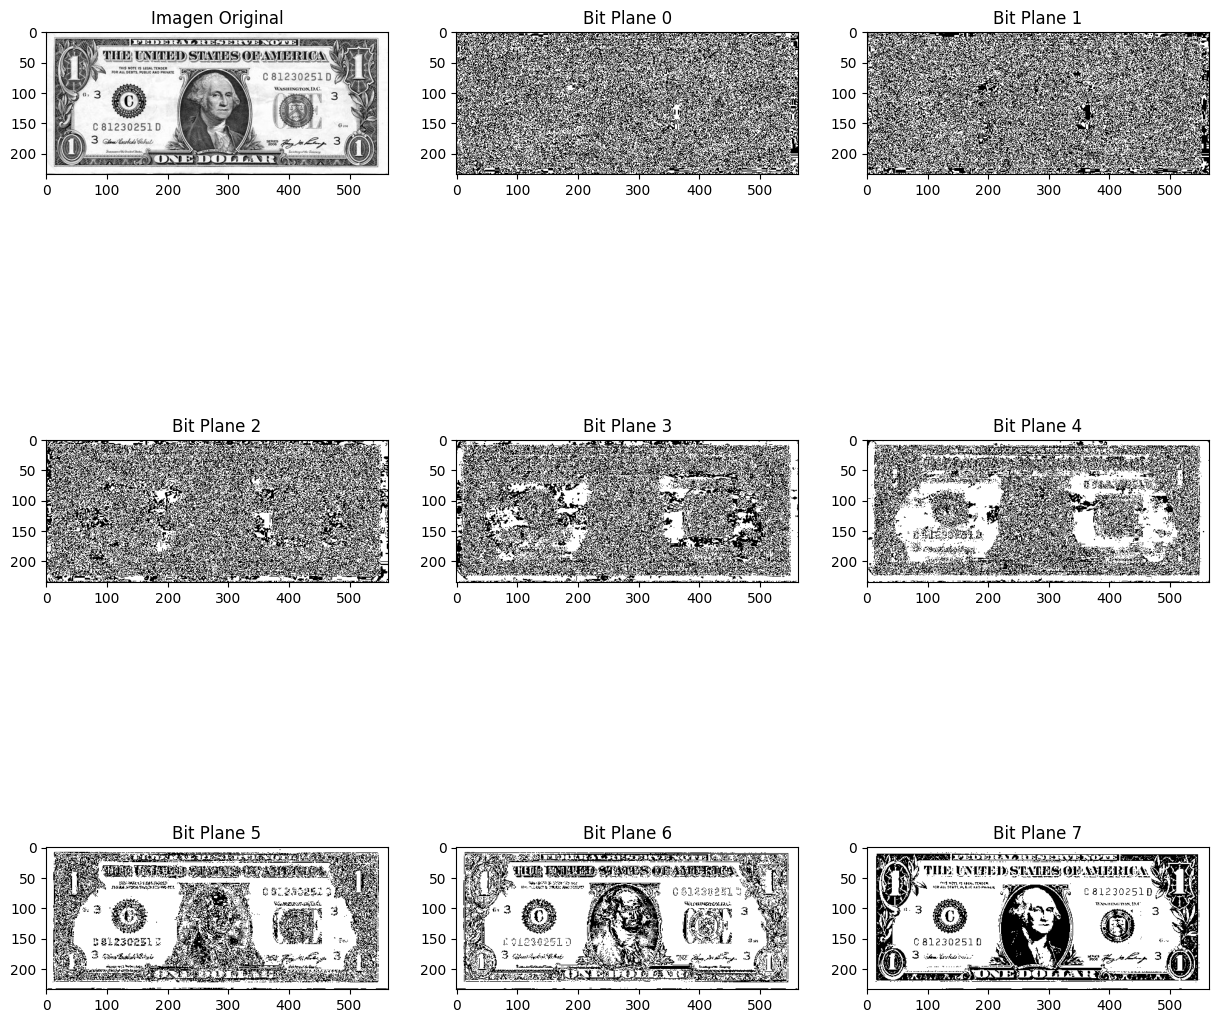

In [13]:
# bit plane dollar
img = cv2.imread('Imagenes/onedollar.jpg', cv2.IMREAD_GRAYSCALE)
ax, fig = plt.subplots(3, 3, figsize=(15, 15))
fig[0, 0].imshow(img, cmap='gray')
fig[0, 0].set_title('Imagen Original')
for i in range(1, 9):
    bit_plane = (img >> (i - 1)) & 1
    fig[(i) // 3, (i) % 3].imshow(bit_plane * 255, cmap='gray')
    fig[(i) // 3, (i) % 3].set_title(f'Bit Plane {i - 1}')
plt.show()


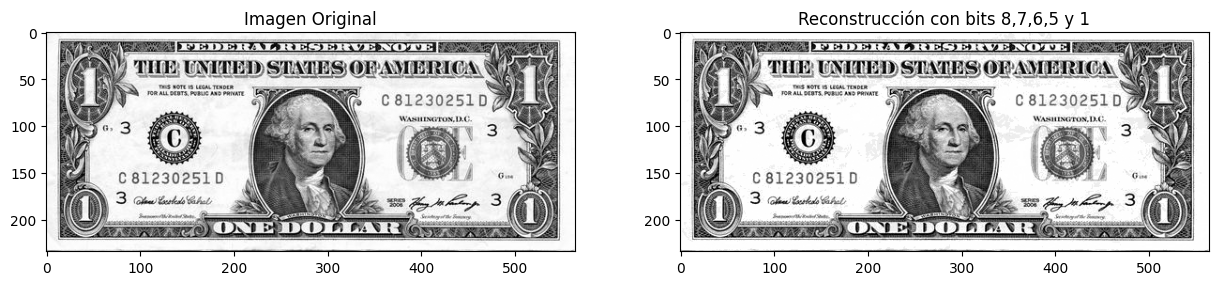

In [22]:
#reconstrucción con varios bit planes (8-7-6-5-1)
img = cv2.imread('Imagenes/onedollar.jpg', cv2.IMREAD_GRAYSCALE)
reconstructed = np.zeros_like(img)
for i in [7, 6, 5, 4, 0]:  # bits 8, 7, 6, 5 (0-indexed)
    bit_plane = (img >> i) & 1
    reconstructed += (bit_plane << i)
ax, fig = plt.subplots(1, 2, figsize=(15, 10))
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
fig[1].imshow(reconstructed, cmap='gray')
fig[1].set_title('Reconstrucción con bits 8,7,6,5 y 1')
plt.show()

# Punto 4 (definición de histograma)

Un histograma es una medida completamente estadística de cuántos pixeles tienen cada nivel de brillo posible. El proceso consiste en recorrer cada pixel de la imagen y *contar* o *registrar* la cantidad de pixeles que posee cada nivel de brillo.

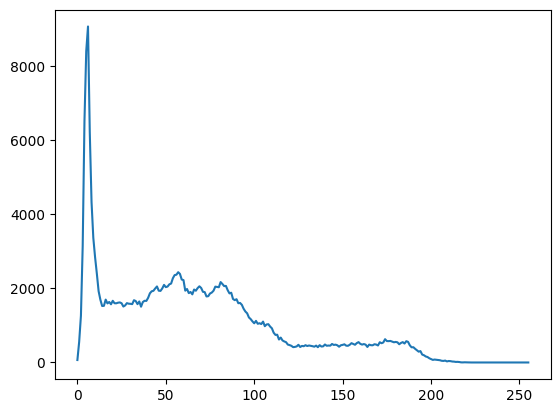

In [23]:
# Función que crea histograma "a mano"
img = cv2.imread('Imagenes/lena_gray.tif', cv2.IMREAD_UNCHANGED)
def calcular_histograma(imagen):
    histograma = np.zeros(256, dtype=int)
    for valor in imagen.flatten():
        histograma[valor] += 1
    return histograma
histograma = calcular_histograma(img)
plt.plot(histograma)

# Punto 5 (brillo y contraste)

El brillo representa el nivel general de luminosidad de una imagen, y puede verse como el valor medio de las intensidades de todos los pixeles de una imagen, lo que se vería como el valor *central* del histograma. Dicho esto, aumentar el brillo de una imagen es *desplazar* el histograma hacia valores mayores de intensidad.

En cambio, el contraste representa el rango dinámico de la imagen. Puede verse como la diferencia (o relación) que hay entre el valor de intensidad más bajo de la imagen, con el más alto. También puede verse explícitamente como la desviación estándar de las intensidades. Así, un *alto contraste* se observa como un histograma más "expandido", y un *bajo contraste* se vé como un histograma comprimido, (como la imagen original del ojo).

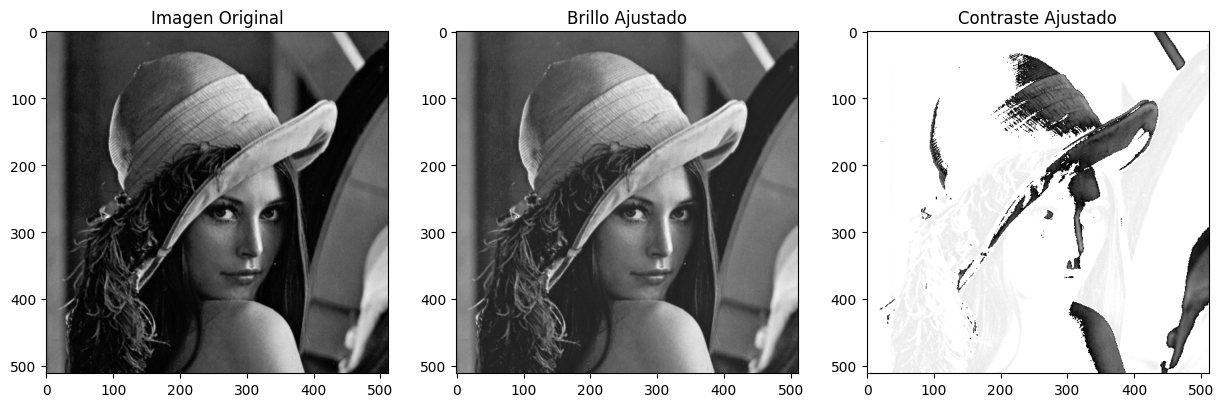

In [ ]:
# codigo que modifica el brillo y contraste de una imagen
img = cv2.imread('Imagenes/lena_gray.tif', cv2.IMREAD_UNCHANGED)
def ajustar_brillo(imagen, valor_brillo):
    imagen_ajustada = np.clip(imagen + valor_brillo, 0, 255)
    return imagen_ajustada.astype(np.uint8)

def ajustar_contraste(imagen, factor_expansion):
    # Calcular media y desviación estándar actual
    media = np.mean(imagen)
    
    # Aplicar la expansión del contraste alrededor de la media
    imagen_ajustada = np.clip((imagen - media) * factor_expansion + media, 0, 255)
    return imagen_ajustada.astype(np.uint8)

brillo_ajustado = ajustar_brillo(img, 30)
contraste_ajustado = ajustar_contraste(img, 0.9)
ax, fig = plt.subplots(1, 3, figsize=(15, 5))
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
fig[1].imshow(brillo_ajustado, cmap='gray')
fig[1].set_title('Brillo Ajustado')
fig[2].imshow(contraste_ajustado, cmap='gray')
fig[2].set_title('Contraste Ajustado')
plt.show()